## Problem Formation

- The aim of building a machine learning model is to solve a problem and to define a metric to measure model performance.

- The problem is to model and investigate the linear relationship between Sales and Advertising dataset for a dietary weight control product.

- we have used two performance metrics RMSE (Root Mean Square Value) and R2 Score value to compute our model performance.

### Linear Regression
<p>Linear Regression is a statistical technique which is used to find the linear relationship between dependent and one or more independent variables. This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable.<p>
<p>Linear Regression can be further classified into two types – Simple and Multiple Linear Regression. In this project, I employ Simple Linear Regression technique where I have one independent and one dependent variable. It is the simplest form of Linear Regression where we fit a straight line to the data.<p>

### Ordinary Least Square Method

the Sales and Advertising data are given by X and y respectively. We can draw a scatter plot between X and y which shows the relationship between them.

Now, our task is to find a line which best fits this scatter plot. This line will help us to predict the value of any Target variable for any given Feature variable. This line is called Regression line.

We can define an error function for any line. Then, the regression line is the one which minimizes the error function. Such an error function is also called a Cost function.

### Cost Function
We want the Regression line to resemble the dataset as closely as possible. In other words, we want the line to be as close to actual data points as possible. It can be achieved by minimizing the vertical distance between the actual data point and fitted line. we calculate the vertical distance between each data point and the line. This distance is called the residual.

So, in a regression model, we try to minimize the residuals by finding the line of best fit. The residuals are represented by the vertical dotted lines from actual data points to the line.

We can try to minimize the sum of the residuals, but then a large positive residual would cancel out a large negative residual. For this reason, we minimize the sum of the squares of the residuals.

Mathematically, we denote actual data points by yi and predicted data points by ŷi. So, the residual for a data point i would be given as

            di = yi -  ŷi
Sum of the squares of the residuals is given as:

            D = Ʃ di**2       for all data points


This is the Cost function. It denotes the total error present in the model which is the sum of the total errors of each individual data point.

We can estimate the parameters of the model β0 and β1 by minimize the error in the model by minimizing D. Thus, we can find the regression line given by equation (1).

This method of finding the parameters of the model and thus regression line is called Ordinary Least Square Method.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import r2_score

## Loading Dataset 

In [2]:
# Converting .txt to .csv

#read_file = pd.read_csv (r'C:\Users\96653\Desktop\python project\Simple_Linear_Regression\SALES.txt')
#read_file.to_csv (r'C:\Users\96653\Desktop\python project\Simple_Linear_Regression\New_SALES.csv')

# Loading dataset

df=pd.read_csv('New_SALES.csv')

## Data Analysis

In [3]:
df.shape

(36, 2)

In [4]:
df.head()

,0,1
0,12.0,15
1,20.5,16
2,21.0,18
3,15.5,27
4,15.3,21


### Renaming Coloumn

In [5]:
# Rename columns of df dataframe

df.columns = ['Sales', 'Advertising']

In [6]:
df.head()

,Sales,Advertising
0,12.0,15
1,20.5,16
2,21.0,18
3,15.5,27
4,15.3,21


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        36 non-null     float64
 1   Advertising  36 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 704.0 bytes


In [8]:
df.describe()

,Sales,Advertising
count,36.000000,36.000000
mean,24.255556,28.527778
std,6.185118,18.777625
min,12.000000,1.000000
25%,20.300000,15.750000
50%,24.250000,23.000000
75%,28.600000,41.000000
max,36.500000,65.000000


### Declaring Variables

In [9]:
#Independent variable as Feature variable and Dependent variable as Target variable or Response Variable

X = df['Sales'].values
y = df['Advertising'].values

# Sales and Advertising data values are given by X and y respectively.

# Values attribute of pandas dataframe returns the numpy arrays.

In [10]:
X

array([12. , 20.5, 21. , 15.5, 15.3, 23.5, 24.5, 21.3, 23.5, 28. , 24. ,
       15.5, 17.3, 25.3, 25. , 36.5, 36.5, 29.6, 30.5, 28. , 26. , 21.5,
       19.7, 19. , 16. , 20.7, 26.5, 30.6, 32.3, 29.5, 28.3, 31.3, 32.3,
       26.4, 23.4, 16.4])

In [11]:
y

array([15, 16, 18, 27, 21, 49, 21, 22, 28, 36, 40,  3, 21, 29, 62, 65, 46,
       44, 33, 62, 22, 12, 24,  3,  5, 14, 36, 40, 49,  7, 52, 65, 17,  5,
       17,  1], dtype=int64)

### Visual exploratory data analysis

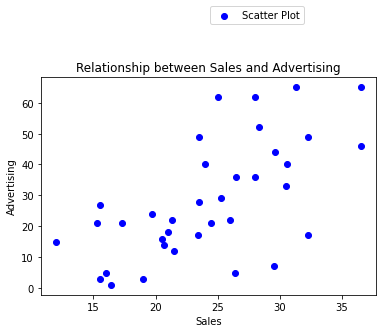

In [12]:
# Plot scatter plot between X and y
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(bbox_to_anchor =(0.80, 1.35), ncol = 3)
plt.show()

### Checking dimensions of X and y

<i>We need to check the dimensions of X and y to make sure they are in right format for Scikit-Learn API.

It is an important precursor to model building.

In [13]:
print(X.shape)
print("\n")
print(y.shape)

(36,)


(36,)


### Reshaping X and y

- Since we are working with only one feature variable, so we need to reshape using Numpy reshape() method.

- It specifies first dimension to be -1, which means "unspecified".

- Its value is inferred from the length of the array and the remaining dimensions.

In [14]:
# Reshape X and y

X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [15]:
# Print the dimensions of X and y after reshaping

print(X.shape)
print(y.shape)

(36, 1)
(36, 1)


<b>Notes: We can see the difference in diminsions of X and y before and after reshaping.

### Train Test Split
<br>
<hr>The model learn the relationships from the training data and predict on test data.<hr>

In [16]:
# Splitting Data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Print the dimensions of X_train,X_test,y_train,y_test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 1)
(24, 1)
(12, 1)
(12, 1)


### Mechanics of the model
<br>
I split the dataset into two sets – the training set and the test set. Then, I instantiate the regressor lm and fit it on the training set with the fit method.

In this step, the model learned the relationships between the training data (X_train, y_train).

Now the model is ready to make predictions on the test data (X_test). Hence, I predict on the test data using the predict method.

In [17]:
# Fit the linear model

# Instantiate the linear regression object lm

lm = LinearRegression()


# Train the model using training data sets
lm.fit(X_train,y_train)


# Predict on train data
y_pred_train=lm.predict(X_train)
# Predict on the test data
y_pred_test=lm.predict(X_test)

### Model slope and intercept term
<br>
<b>The model slope is given by lm.coef_ and model intercept term is given by lm.intercept_ 

The estimated model slope and intercept values are 1.60509347 and -11.16003616.

So, the equation of the fitted regression line is

y = 1.60509347 * x - 11.16003616

In [18]:
# Compute model slope and intercept

a = lm.coef_
b = lm.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b)

Estimated model slope, a: [[1.60509347]]
Estimated model intercept, b: (array([-11.16003616]),)


In [19]:
# So, our fitted regression line is 
# Y
# y = 1.60509347 * x - 11.16003616 

# That is our linear model

### Making predictions

I have predicted the Advertising values on first five 5 Sales datasets by writing code

    lm.predict(X) [0:5]  


If I remove [0:5], then I will get predicted Advertising values for the whole Sales dataset.


In [20]:
# Predicting Advertising values

lm.predict(X)[0:5]

# Predicting Advertising values on first five Sales values.

array([[ 8.10108551],
       [21.74438002],
       [22.54692675],
       [13.71891266],
       [13.39789396]])

## Regression metrics for model performance

Now, it is the time to evaluate model performance.

For regression problems, there are two ways to compute the model performance. They are RMSE (Root Mean Square Error) and R-Squared Value. These are explained below:-

### RMSE

<p>RMSE is the standard deviation of the residuals. So, RMSE gives us the standard deviation of the unexplained variance by the model. It can be calculated by taking square root of Mean Squared Error. RMSE is an absolute measure of fit. It gives us how spread the residuals are, given by the standard deviation of the residuals. The more concentrated the data is around the regression line, the lower the residuals and hence lower the standard deviation of residuals. It results in lower values of RMSE. So, lower values of RMSE indicate better fit of data.<p>

In [21]:
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error

print('RMSE Value for Trainig dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train))) #training dataset

print("")

# Tsting Dataset
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print("RMSE value for Testing Dataset: {:.4f}".format(rmse))
print("")


RMSE Value for Trainig dataset is:  15.899951140629824

RMSE value for Testing Dataset: 11.2273



### RMSE of test > RMSE of train => OVER FITTING of the data.
### RMSE of test < RMSE of train => UNDER FITTING of the data.

<b>Notes:
    <p>The RMSE for your training and your test sets should be very similar if you have built a good model. If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data, i.e. you've created a model that tests well in sample, but has little predictive value when tested out of sample.<p>

### R2 Score

<p>R2 Score is another metric to evaluate performance of a regression model. It is also called coefficient of determination. It gives us an idea of goodness of fit for the linear regression models. It indicates the percentage of variance that is explained by the model.

Mathematically,

R2 Score = Explained Variation/Total Variation

In general, the higher the R2 Score value, the better the model fits the data. Usually, its value ranges from 0 to 1. So, we want its value to be as close to 1. Its value can become negative if our model is wrong.<p>

In [28]:
print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print("")
print('The Accuracy R^2  on the training dataset is: ',r2_score(y_train,y_pred_train) )   
print("")
# Calculate and print r2_score


print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred_test)))

The Accuracy  on the training dataset is:  0.2861319267488459

The Accuracy R^2  on the training dataset is:  0.2861319267488459

R2 Score value: 0.5789


## Interpretation and Conclusion

<p>The RMSE value has been found to be 11.2273. It means the standard deviation for our prediction is 11.2273. So, sometimes we expect the predictions to be off by more than 11.2273 and other times we expect less than 11.2273. So, the model is not good fit to the data.

In business decisions, the benchmark for the R2 score value is 0.7. It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7, then the model is not good enough to deploy. Our R2 score value has been found to be .5789. It means that this model explains 57.89 % of the variance in our dependent variable. So, the R2 score value confirms that the model is not good enough to deploy because it does not provide good fit to the data.<p>

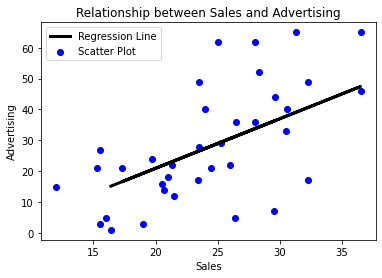

In [27]:
# Plot the Regression Line

plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred_test, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend()
plt.show()

## Residual analysis

- A linear regression model may not represent the data appropriately. The model may be a poor fit to the data. So, we should validate our model by defining and examining residual plots.

- The difference between the observed value of the dependent variable (y) and the predicted value (ŷi) is called the residual and is denoted by e. The scatter-plot of these residuals is called residual plot.

- If the data points in a residual plot are randomly dispersed around horizontal axis and an approximate zero residual mean, a linear regression model may be appropriate for the data. Otherwise a non-linear model may be more appropriate.

- If we take a look at the generated ‘Residual errors’ plot, we can clearly see that the train data plot pattern is non-random. Same is the case with the test data plot pattern. So, it suggests a better-fit for a non-linear model.

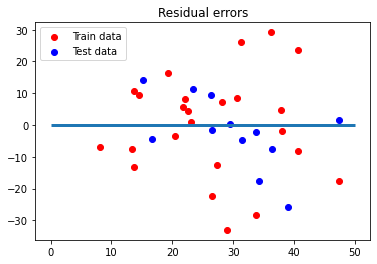

In [30]:
# Plotting residual errors

plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend()
plt.show()

## Checking for Overfitting and Underfitting

<p> <b><i>I calculate training set score as 0.2861. Similarly, I calculate test set score as 0.5789. The training set score is very poor. <p>
    <br>
    
<span style="color:red">So, the model does not learn the relationships appropriately from the training data. Thus, the model performs poorly on the training data. It is a clear sign of Underfitting. Hence, I validated my finding that the linear regression model does not provide good fit to the data.</span>

<br>
Underfitting means our model performs poorly on the training data. It means the model does not capture the relationships between the training data. This problem can be improved by increasing model complexity. We should use more powerful models like Polynomial regression to increase model complexity.

# Saving Model for Future use


In [32]:
# Save model for future use

import joblib
joblib.dump(lm, 'lm_regressor.pkl')

# To load the model

# lm2=joblib.load('lm_regressor.pkl')

['lm_regressor.pkl']

## Simple Linear Regression - Model Assumptions

The Linear Regression Model is based on several assumptions which are listed below:-

1. Linear relationship 

2. Multivariate normality 
3. No or little multicollinearity 
4. No auto-correlation 5. Homoscedasticity


### Linear relationship

The relationship between response and feature variables should be linear. This linear relationship assumption can be tested by plotting a scatter-plot between response and feature variables.

### Multivariate normality

The linear regression model requires all variables to be multivariate normal. A multivariate normal distribution means a vector in multiple normally distributed variables, where any linear combination of the variables is also normally distributed.

### No or little multicollinearity

It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are highly correlated.

### No auto-correlation

Also, it is assumed that there is little or no auto-correlation in the data. Autocorrelation occurs when the residual errors are not independent from each other.

### Homoscedasticity

Homoscedasticity describes a situation in which the error term (that is, the noise in the model) is the same across all values of the independent variables. It means the residuals are same across the regression line. It can be checked by looking at scatter plot.